In [60]:
import stackstac
import pystac_client

lon1, lat1 = 4.375515, 52.003655
lon2, lat2 = 4.377632, 52.003704
lon3, lat3 = 4.375718, 52.001734
lon4, lat4 = 4.377835, 52.001783



URL = "https://earth-search.aws.element84.com/v1"
catalog = pystac_client.Client.open(URL)



items = catalog.search(
    # intersects=dict(type="Polygon", coordinates=[[[lon1, lat1], [lon2, lat2], [lon3, lat3], [lon4, lat4]]]),
    intersects=dict(type="Point", coordinates=[lon1, lat1]),
    collections=["sentinel-2-l2a"],
    datetime="2024-01-01/2024-02-01"
).item_collection()
len(items)



stack = stackstac.stack(items, epsg=32631)



/home/aoqiao/miniconda3/envs/myenv/lib/python3.10/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


In [61]:
stack

<xarray.DataArray 'stackstac-055def097067234a4808010fb430dc2c' (time: 5,
                                                                band: 14,
                                                                y: 10980,
                                                                x: 10980)>
dask.array<fetch_raster_window, shape=(5, 14, 10980, 10980), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/39)
  * time                              (time) datetime64[ns] 2024-01-05T10:56:...
    id                                (time) <U24 'S2B_31UET_20240105_0_L1C' ...
  * band                              (band) <U8 'blue' 'cirrus' ... 'visual'
  * x                                 (x) float64 5e+05 5e+05 ... 6.098e+05
  * y                                 (y) float64 5.8e+06 5.8e+06 ... 5.69e+06
    s2:datatake_id                    (time) <U34 'GS2B_20240105T105339_03568...
    ...                                ...
    title                             (band) <U30 'Blue (band 2) - 10m' ... '...
    gsd                               (band) object 10 60 60 10 ... 20 20 None
    common_name                       (band) object 'blue' 'cirrus' ... None
    center_wavelength                 (band) object 0.49 1.3735 ... 2.19 None
    full_width_half_max               (band) object 0.098 0.075 ... 0.242 None
    epsg                              int64 32631
Attributes:
    spec:        RasterSpec(epsg=32631, bounds=(499980.0, 5690220.0, 609780.0...
    crs:         epsg:32631
    transform:   | 10.00, 0.00, 499980.00|\n| 0.00,-10.00, 5800020.00|\n| 0.0...
    resolution:  10.0

In [74]:
stack

<xarray.DataArray 'stackstac-055def097067234a4808010fb430dc2c' (time: 5,
                                                                band: 14,
                                                                y: 10980,
                                                                x: 10980)>
dask.array<fetch_raster_window, shape=(5, 14, 10980, 10980), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/39)
  * time                              (time) datetime64[ns] 2024-01-05T10:56:...
    id                                (time) <U24 'S2B_31UET_20240105_0_L1C' ...
  * band                              (band) <U8 'blue' 'cirrus' ... 'visual'
  * x                                 (x) float64 5e+05 5e+05 ... 6.098e+05
  * y                                 (y) float64 5.8e+06 5.8e+06 ... 5.69e+06
    s2:datatake_id                    (time) <U34 'GS2B_20240105T105339_03568...
    ...                                ...
    title                             (band) <U30 'Blue (band 2) - 10m' ... '...
    gsd                               (band) object 10 60 60 10 ... 20 20 None
    common_name                       (band) object 'blue' 'cirrus' ... None
    center_wavelength                 (band) object 0.49 1.3735 ... 2.19 None
    full_width_half_max               (band) object 0.098 0.075 ... 0.242 None
    epsg                              int64 32631
Attributes:
    spec:        RasterSpec(epsg=32631, bounds=(499980.0, 5690220.0, 609780.0...
    crs:         epsg:32631
    transform:   | 10.00, 0.00, 499980.00|\n| 0.00,-10.00, 5800020.00|\n| 0.0...
    resolution:  10.0

In [78]:
stack['earthsearch:s3_path']

<xarray.DataArray 'earthsearch:s3_path' (time: 5)>
array(['s3://earthsearch-data/sentinel-2-l1c/31/U/ET/2024/1/S2B_31UET_20240105_0_L1C',
       's3://earthsearch-data/sentinel-2-l1c/31/U/ET/2024/1/S2A_31UET_20240110_0_L1C',
       's3://earthsearch-data/sentinel-2-l1c/31/U/ET/2024/1/S2A_31UET_20240120_0_L1C',
       's3://earthsearch-data/sentinel-2-l1c/31/U/ET/2024/1/S2B_31UET_20240125_0_L1C',
       's3://earthsearch-data/sentinel-2-l1c/31/U/ET/2024/1/S2A_31UET_20240130_0_L1C'],
      dtype='<U76')
Coordinates: (12/30)
  * time                              (time) datetime64[ns] 2024-01-05T10:56:...
    id                                (time) <U24 'S2B_31UET_20240105_0_L1C' ...
    s2:datatake_id                    (time) <U34 'GS2B_20240105T105339_03568...
    proj:epsg                         int64 32631
    s2:datastrip_id                   (time) <U64 'S2B_OPER_MSI_L1C_DS_2BPS_2...
    s2:sequence                       <U1 '0'
    ...                                ...
    earthsearch:s3_path               (time) <U76 's3://earthsearch-data/sent...
    platform                          (time) <U11 'sentinel-2b' ... 'sentinel...
    view:sun_elevation                (time) float64 14.59 15.16 ... 17.9 19.14
    s2:granule_id                     (time) <U62 'S2B_OPER_MSI_L1C_TL_2BPS_2...
    eo:cloud_cover                    (time) float64 67.14 1.191 ... 99.93 92.56
    epsg                              int64 32631

In [76]:
# plot the AOI
for stac_asset in stack.earthsearch.values():
    stac_asset.href = stac_asset.href.replace(
        "s3://sentinel-s2-l2a/", "s3://sentinel-s2-l1c/"
    )

AttributeError: 'DataArray' object has no attribute 'earthsearch'

In [62]:
lowcloud = stack[stack["eo:cloud_cover"] < 20]
rgb = lowcloud.sel(band=["red", "green", "blue"])
monthly = rgb.resample(time="MS").median("time", keep_attrs=True)


In [63]:
import pyproj
x_utm, y_utm = pyproj.Proj(monthly.crs)(lon1, lat1)
buffer = 160  # meters

In [69]:

aoi = monthly.loc[..., y_utm+buffer:y_utm-buffer, x_utm-buffer:x_utm+buffer]
aoi

<xarray.DataArray 'stackstac-055def097067234a4808010fb430dc2c' (time: 1,
                                                                band: 3, y: 32,
                                                                x: 32)>
dask.array<getitem, shape=(1, 3, 32, 32), dtype=float64, chunksize=(1, 1, 19, 32), chunktype=numpy.ndarray>
Coordinates: (12/23)
  * band                    (band) <U8 'red' 'green' 'blue'
  * x                       (x) float64 5.936e+05 5.936e+05 ... 5.939e+05
  * y                       (y) float64 5.759e+06 5.759e+06 ... 5.759e+06
    proj:epsg               int64 32631
    s2:sequence             <U1 '0'
    s2:datatake_type        <U8 'INS-NOBS'
    ...                      ...
    gsd                     (band) object 10 10 10
    common_name             (band) object 'red' 'green' 'blue'
    center_wavelength       (band) object 0.665 0.56 0.49
    full_width_half_max     (band) object 0.038 0.045 0.098
    epsg                    int64 32631
  * time                    (time) datetime64[ns] 2024-01-01
Attributes:
    spec:        RasterSpec(epsg=32631, bounds=(499980.0, 5690220.0, 609780.0...
    crs:         epsg:32631
    transform:   | 10.00, 0.00, 499980.00|\n| 0.00,-10.00, 5800020.00|\n| 0.0...
    resolution:  10.0

In [70]:
aoi.values

RuntimeError: Error opening 's3://sentinel-s2-l1c/tiles/31/U/ET/2024/1/10/0/B02.jp2': RasterioIOError('AWS_SECRET_ACCESS_KEY and AWS_NO_SIGN_REQUEST configuration options not defined, and /home/aoqiao/.aws/credentials not filled')

RuntimeError: Error opening 's3://sentinel-s2-l1c/tiles/31/U/ET/2024/1/10/0/B02.jp2': RasterioIOError('AWS_SECRET_ACCESS_KEY and AWS_NO_SIGN_REQUEST configuration options not defined, and /home/aoqiao/.aws/credentials not filled')

In [65]:
import dask.diagnostics
with dask.diagnostics.ProgressBar():
    data = aoi.compute()

[########                                ] | 20% Completed | 101.92 ms


RuntimeError: Error opening 's3://sentinel-s2-l1c/tiles/31/U/ET/2024/1/10/0/B02.jp2': RasterioIOError('AWS_SECRET_ACCESS_KEY and AWS_NO_SIGN_REQUEST configuration options not defined, and /home/aoqiao/.aws/credentials not filled')

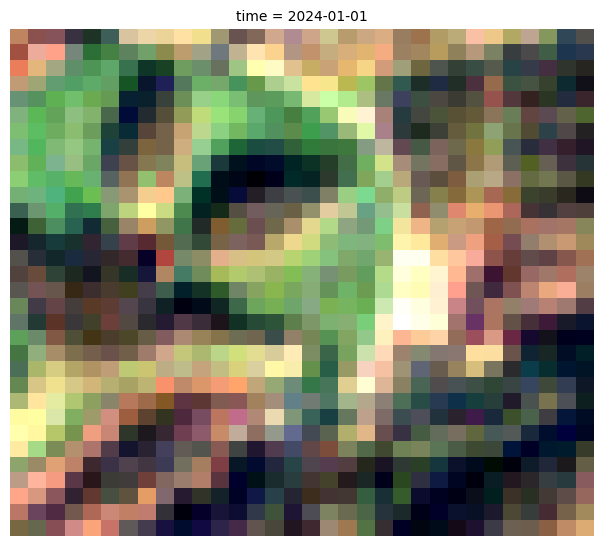

In [ ]:
# save only yhe fi
import matplotlib.pyplot as plt
data.plot.imshow(row="time", rgb="band", robust=True, size=6)
plt.axis('off')  # turns off axes
plt.xticks([]), plt.yticks([])  # removes axes ticks
plt.box(False)  # removes the box frame

plt.savefig('test.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [54]:
# load the image 
from PIL import Image
img = Image.open('test.png')

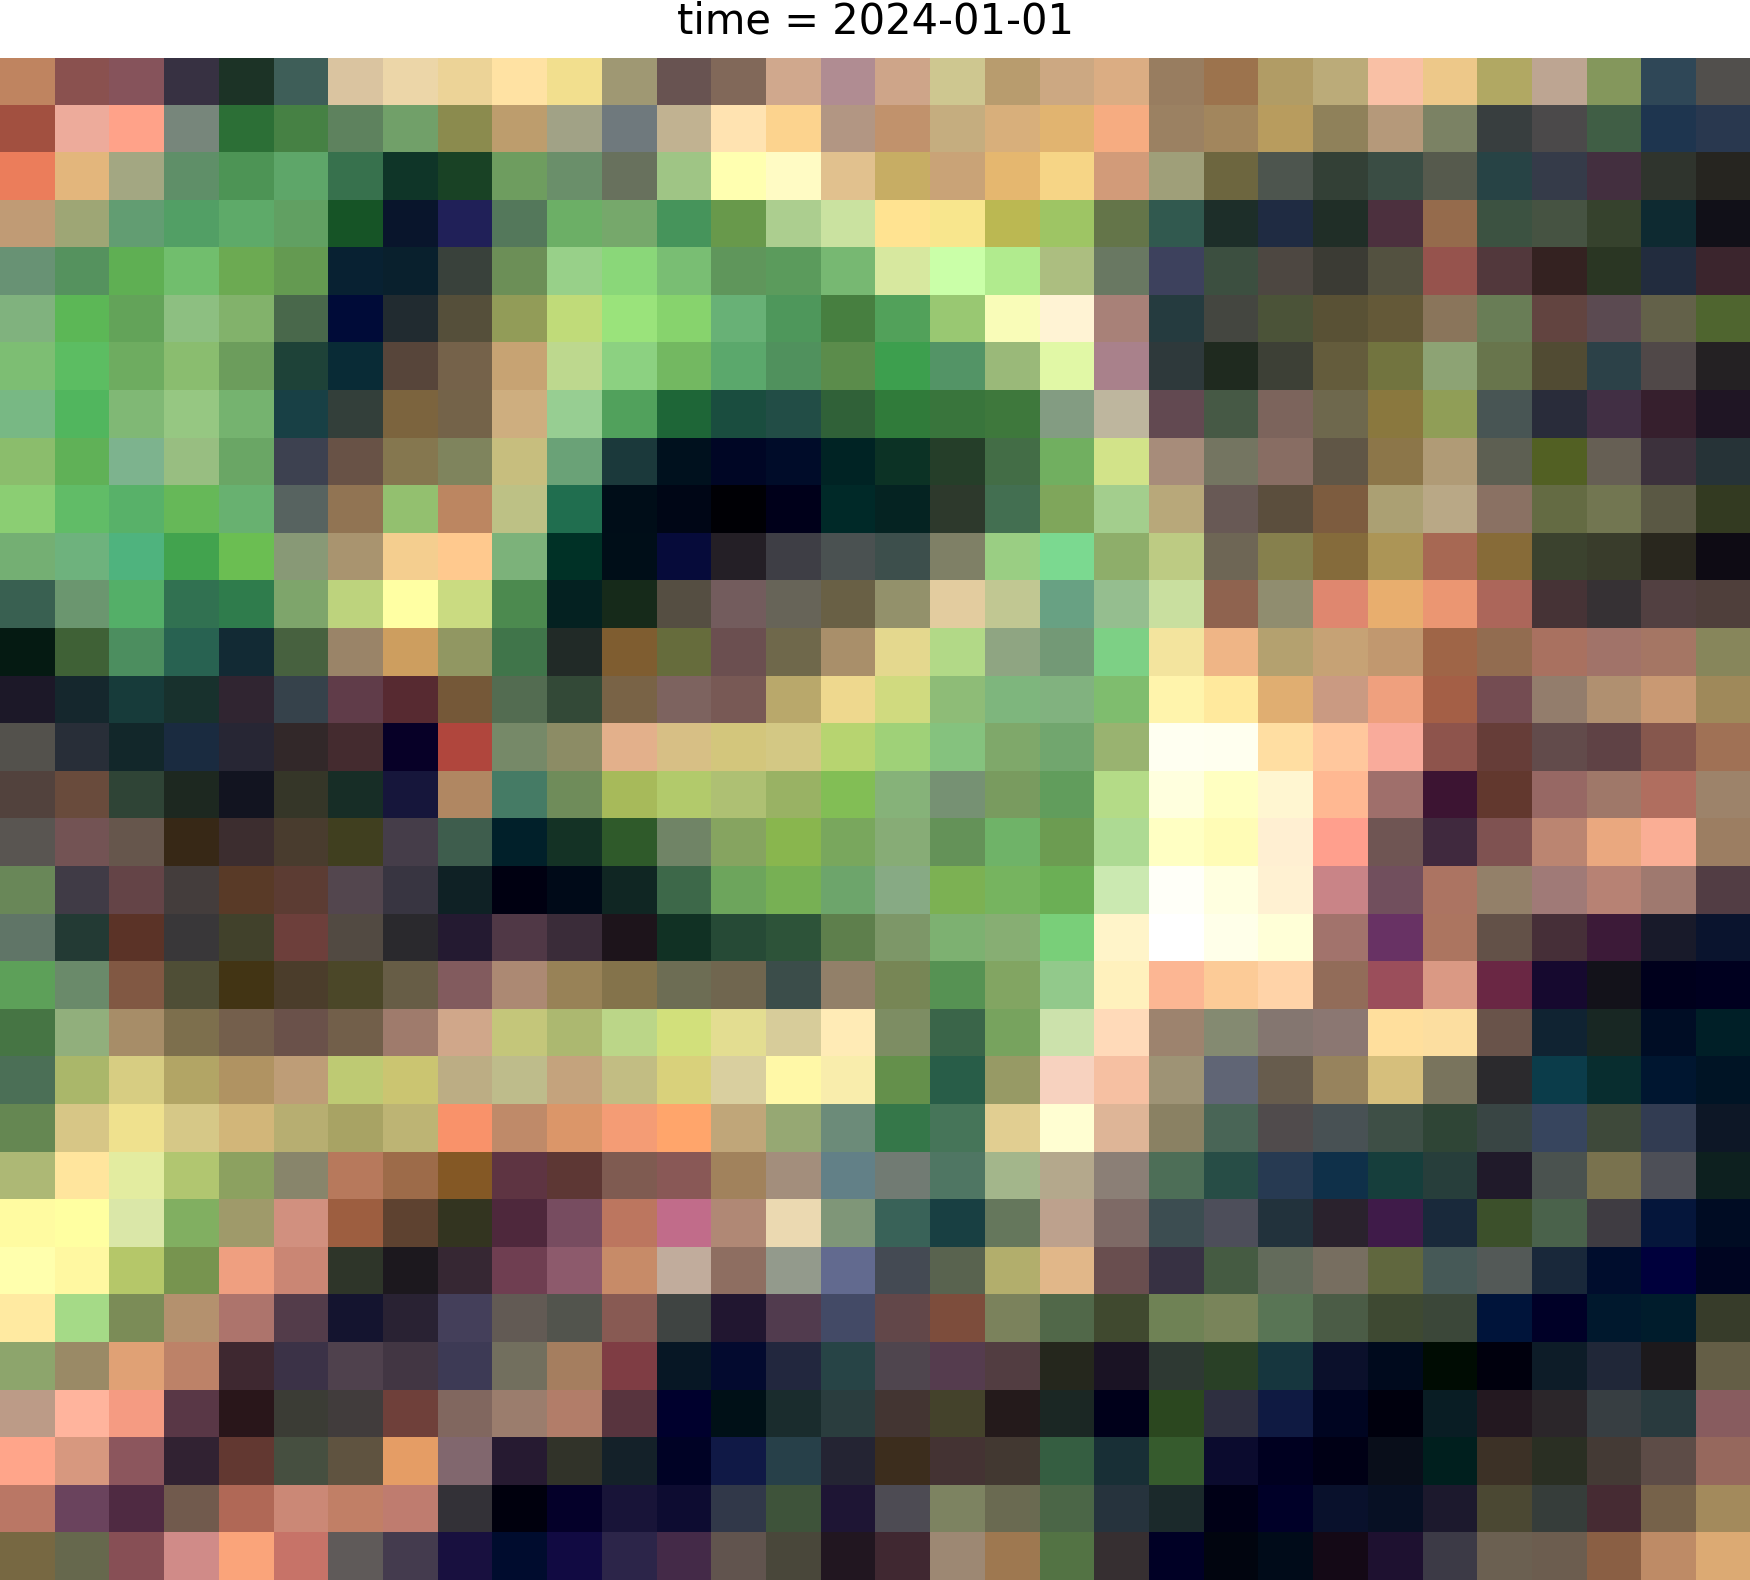

In [55]:
img

/tmp/ipykernel_6156/1584455009.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((32, 33), Image.ANTIALIAS)


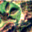

In [56]:
# resize it to 33x32
img = img.resize((32, 33), Image.ANTIALIAS)
# remove the first row
img = img.crop((0, 1, 32, 33))
img

In [57]:
img.size

(32, 32)

In [58]:
# convert to numpy array
import numpy as np
img_array = np.array(img)
img_array.shape
# remove the alpha channel
img_array = img_array[:, :, :3]

# save the image as png
import imageio
imageio.imwrite('example3.png', img_array)

In [42]:
# mean of each channel
mean = img_array.mean(axis=(0, 1))
mean

array([82.82226562, 75.21191406, 68.609375  ])

In [59]:
# load the testtest image
img = Image.open('testtest.png')


# convert to numpy array
img_array = np.array(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x7FAF783DD870>


In [46]:
img_array.mean(axis=(0, 1))

array([69.72851562, 74.91015625, 78.7734375 ])